In [11]:
# Copiamos cosas de la clase pasada

import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split


data = pd.read_csv("https://raw.githubusercontent.com/Club-datos-FCEN/ClubDeDatos/main/2022/01%20-%20Propiedades/CABAprop.csv")  #cargo los datos

data = data[data["bedrooms"] != 130]
data = data.drop(columns="bedrooms")
data = data.dropna()

data = data[data["property_type"] == "Departamento"]
data = data.drop(columns = "property_type")

# Convertimos a categorico
data = pd.get_dummies(data)

# Saco a los outliers usando el rango interquartil (magia rara de los estadistas)
precios = data["price"]
q1 = precios.quantile(0.25)
q3 = precios.quantile(0.75)
rango = q3 - q1

umbral_arriba = q3 + 1.5*rango
umbral_abajo = q1 - 1.5*rango

sin_outliers = data[(data["price"]>umbral_abajo) & (data["price"]<umbral_arriba)]

# Separo los datos en x e y, y en entrenamiento y validación

sin_outliers_input = sin_outliers.drop(columns="price")
precios_sin_outliers = sin_outliers[["price"]]
x_train, x_test, y_train, y_test = train_test_split(sin_outliers_input,precios_sin_outliers,test_size=0.2)

modelo = keras.Sequential([
    keras.layers.Dense(256,activation ="relu",input_shape = (63,)),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(16,activation = "relu"),
    keras.layers.Dense(1,activation = "relu")
])

modelo.compile(optimizer="adam", loss="mae")

Epoch 1/20
958/958 [==============================] - 3s 2ms/step - loss: 59636.5820 - val_loss: 40778.5273
Epoch 2/20
958/958 [==============================] - 2s 2ms/step - loss: 35403.2969 - val_loss: 30913.7949
Epoch 3/20
958/958 [==============================] - 2s 3ms/step - loss: 30691.3613 - val_loss: 30282.4375
Epoch 4/20
958/958 [==============================] - 2s 2ms/step - loss: 29698.6270 - val_loss: 29910.3340
Epoch 5/20
958/958 [==============================] - 2s 3ms/step - loss: 29473.2246 - val_loss: 28686.2207
Epoch 6/20
958/958 [==============================] - 3s 3ms/step - loss: 29200.6719 - val_loss: 29137.5840
Epoch 7/20
958/958 [==============================] - 4s 4ms/step - loss: 29013.1309 - val_loss: 28283.5977
Epoch 8/20
958/958 [==============================] - 3s 3ms/step - loss: 28946.3047 - val_loss: 28420.8984
Epoch 9/20
958/958 [==============================] - 3s 3ms/step - loss: 28768.8750 - val_loss: 27994.0566
Epoch 10/20
958/958 [=======

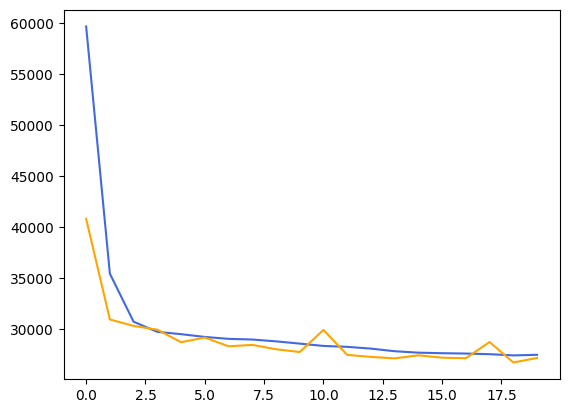

In [12]:
# Algo que me olvidé mostrar la otra vez: 
#   mostrar la pérdida sobre el set de validación

historial = modelo.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test), validation_freq=1)
plt.plot(historial.history['loss'], color='royalblue')
plt.plot(historial.history['val_loss'], color='orange')
plt.show()

In [13]:
# Ahora veamos el truquito que faltó
from sklearn.preprocessing import MinMaxScaler

# Normalicemos los datos, es decir, llevemoslo al mismo rango
scaler_input = MinMaxScaler()
scaler_target = MinMaxScaler()
input_norm = scaler_input.fit_transform(sin_outliers_input)
precios_norm = scaler_target.fit_transform(precios_sin_outliers)

# Veamos como quedaron los rangos
input_norm

array([[0.95563334, 0.39132046, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58175338, 0.6117412 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58175338, 0.6117412 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72243331, 0.30330355, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.51620125, 0.84012364, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.51357865, 0.75127718, 0.8       , ..., 0.        , 0.        ,
        0.        ]])

Epoch 1/20
958/958 [==============================] - 3s 2ms/step - loss: 0.0933 - val_loss: 0.0857
Epoch 2/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0867 - val_loss: 0.0854
Epoch 3/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0849 - val_loss: 0.0861
Epoch 4/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0828 - val_loss: 0.0819
Epoch 5/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0800 - val_loss: 0.0776
Epoch 6/20
958/958 [==============================] - 3s 3ms/step - loss: 0.0755 - val_loss: 0.0723
Epoch 7/20
958/958 [==============================] - 3s 3ms/step - loss: 0.0719 - val_loss: 0.0703
Epoch 8/20
958/958 [==============================] - 3s 3ms/step - loss: 0.0689 - val_loss: 0.0682
Epoch 9/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0676 - val_loss: 0.0659
Epoch 10/20
958/958 [==============================] - 2s 2ms/step - loss: 0.0662 - val_loss: 0.0664

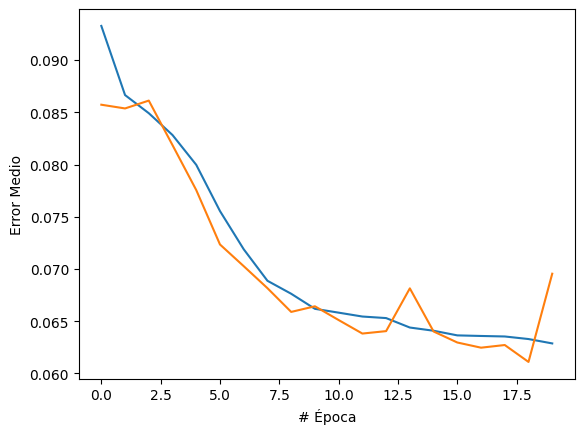

In [14]:
# Repetimos lo que ya sabemos
x_train, x_test, y_train, y_test = train_test_split(input_norm, precios_norm, test_size=0.2)

modelo = keras.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(63,)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="relu")
])

modelo.compile(optimizer="adam", loss="mae")
historial = modelo.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), validation_freq=1)

plt.plot(historial.history["loss"])
plt.plot(historial.history["val_loss"])
plt.xlabel("# Época")
plt.ylabel("Error Medio")
plt.show()

Perdimos la interpretabilidad! Como podemos llevar ese error que vemos ahora de vuelta a las unidades originales?

In [15]:
# Evaluate model
y_pred = modelo.predict(x_test)
y_test_orig = scaler_target.inverse_transform(y_test)
y_pred_orig = scaler_target.inverse_transform(y_pred)
diff_orig = y_pred_orig - y_test_orig
mae_orig = abs(diff_orig).mean()

print("MAE original:", mae_orig)

240/240 [==============================] - 0s 1ms/step
MAE original: 29765.807080485876


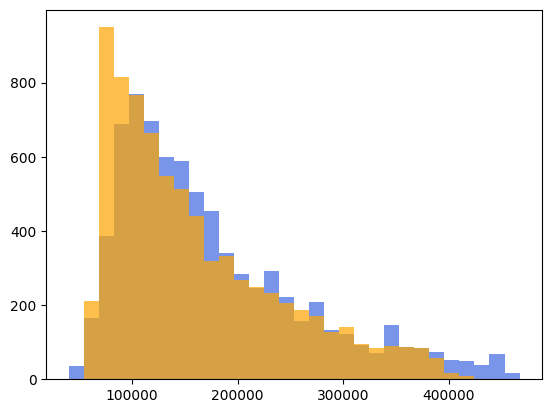

In [16]:
_, bins, _ = plt.hist(y_test_orig, bins=30, alpha=0.7, color='royalblue')
plt.hist(y_pred_orig, bins=bins, alpha=0.7, color='orange')
plt.show()

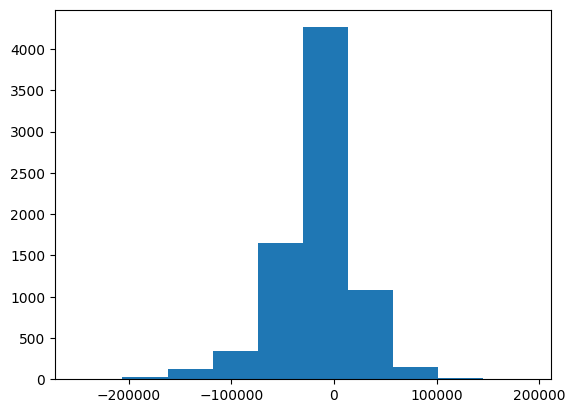

In [17]:
# Veamos si estamos sub/sobreestimando
plt.hist(diff_orig)
plt.show()

In [18]:
# Testemos el modelo en el dataset original, con outliers
data_norm2 = scaler_input.transform(data.drop(columns='price'))
precios_norm2 = scaler_target.transform(data[['price']])

x_train, x_test, y_train, y_test = train_test_split(data_norm2, precios_norm2, test_size=0.2)

y_pred = modelo.predict(x_test)

y_test_orig2 = scaler_target.inverse_transform(y_test)
y_pred_orig2 = scaler_target.inverse_transform(y_pred)

diff_orig2 = y_pred_orig2 - y_test_orig2
mae_orig2 = abs(diff_orig2).mean()

print("MAE original:", mae_orig2)

262/262 [==============================] - 0s 1ms/step
MAE original: 63821.32343218474


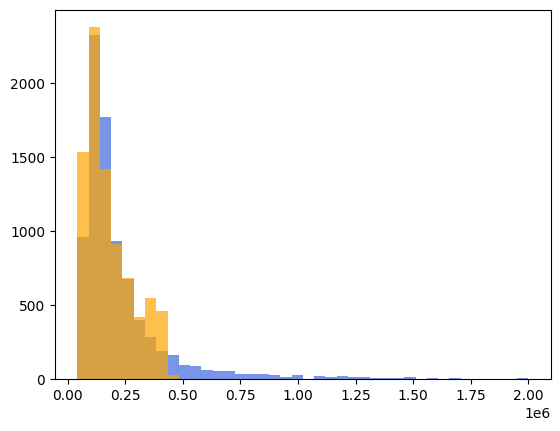

In [19]:
_, bins, _ = plt.hist(y_test_orig2, bins=40, alpha=0.7, color='royalblue')
plt.hist(y_pred_orig2, bins=bins, alpha=0.7, color='orange')
plt.show()